## Revenue Forecasting

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [17]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [18]:
# Load the dataset
file_path = 'Resources/Final customer dataset.csv'  
customer_df = pd.read_csv(file_path)

In [19]:
# Display the first few rows of the DataFrame
customer_df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,4625100001,2020-09-08 9:38,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,4625100001,2022-03-05 12:56,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,4625100001,2022-05-23 18:18,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,4625100001,2020-11-12 13:13,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,1359300001,2020-11-27 17:55,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


In [20]:
# Inspect the dataset
print("Columns in the dataset:", customer_df.columns)
print(customer_df.head())

Columns in the dataset: Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age',
       'Returns', 'Customer Name', 'Age', 'Gender', 'Churn'],
      dtype='object')
   Customer ID     Purchase Date Product Category  Product Price  Quantity  \
0   4625100001   2020-09-08 9:38      Electronics             12         3   
1   4625100001  2022-03-05 12:56             Home            468         4   
2   4625100001  2022-05-23 18:18             Home            288         2   
3   4625100001  2020-11-12 13:13         Clothing            196         1   
4   1359300001  2020-11-27 17:55             Home            449         1   

   Total Purchase Amount Payment Method  Customer Age  Returns  \
0                    740    Credit Card            37      0.0   
1                   2739         PayPal            37      0.0   
2                   3196         PayPal            37      0.0   
3    

In [21]:
# Verify the target column name
target_column = 'Total Purchase Amount'  # Update if the actual name differs
if target_column not in customer_df.columns:
    raise KeyError(f"Column '{target_column}' not found in the dataset.")

In [22]:
# Drop irrelevant columns
irrelevant_columns = ['Customer Name', 'Purchase Date', 'Customer ID', 'Churn', 'Returns']
customer_df.drop(columns=[col for col in irrelevant_columns if col in customer_df.columns], inplace=True)

In [23]:
# Define features (X) and target (y)
X = customer_df.drop(columns=[target_column])
y = customer_df[target_column]

In [24]:
# Identify numeric and categorical columns after dropping the target column
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [25]:
# Fill missing values for categorical columns with the mode (most frequent value)
for col in categorical_cols:
    customer_df[col] = customer_df[col].fillna(customer_df[col].mode()[0])

In [27]:
# Identify numeric and categorical columns after dropping the target column
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),  # Scale numeric features
        ('cat', OneHotEncoder(drop='first'), categorical_cols)  # Encode categorical features
    ]
)

In [30]:
# Apply preprocessing to training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [32]:
# Build the Neural Network Model
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_processed.shape[1]),  # Input layer
    Dropout(0.2),  # Dropout for regularization
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.2),  # Dropout for regularization
    Dense(1)  # Output layer for regression
])

c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Mean Squared Error as the loss function

In [34]:
# Train the model
history = model.fit(
    X_train_processed, y_train,
    validation_data=(X_test_processed, y_test),
    epochs=50,  # Number of training iterations
    batch_size=32,  # Number of samples per batch
    verbose=1
)

Epoch 1/50
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - loss: 2915657.7500 - mae: 1415.8049 - val_loss: 2074772.6250 - val_mae: 1246.4495
Epoch 2/50
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 2150448.5000 - mae: 1263.8202 - val_loss: 2070909.7500 - val_mae: 1245.5991
Epoch 3/50
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - loss: 2144304.2500 - mae: 1261.5101 - val_loss: 2073448.2500 - val_mae: 1246.0632
Epoch 4/50
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - loss: 2148567.0000 - mae: 1263.3494 - val_loss: 2069287.2500 - val_mae: 1245.1329
Epoch 5/50
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - loss: 2148371.7500 - mae: 1262.9452 - val_loss: 2071957.5000 - val_mae: 1245.7808
Epoch 6/50
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - loss: 2149980.0000 - mae: 1264.0623 - val_loss: 2071105.3750 - val_mae: 1245.6069
Epoch 7/50
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 2148193.2500 - mae: 1261.9941 - val_loss: 2072571.2500 - val_mae: 1245.9330
Epoch 8/50
12

In [35]:
# Evaluate the model
train_loss, train_mae = model.evaluate(X_train_processed, y_train, verbose=0)
test_loss, test_mae = model.evaluate(X_test_processed, y_test, verbose=0)
print(f"Train Loss (MSE): {train_loss:.2f}, Train MAE: {train_mae:.2f}")
print(f"Test Loss (MSE): {test_loss:.2f}, Test MAE: {test_mae:.2f}")

Train Loss (MSE): 2082200.75, Train MAE: 1249.80
Test Loss (MSE): 2073371.62, Test MAE: 1246.14


In [36]:
# Make predictions
nn_preds = model.predict(X_test_processed).flatten()

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [37]:
# Evaluate Neural Network Performance
nn_mse = mean_squared_error(y_test, nn_preds)
nn_r2 = r2_score(y_test, nn_preds)
print("\nNeural Network Performance:")
print(f"Mean Squared Error: {nn_mse:.2f}")
print(f"R^2 Score: {nn_r2:.2f}")


Neural Network Performance:
Mean Squared Error: 2073371.88
R^2 Score: 0.00


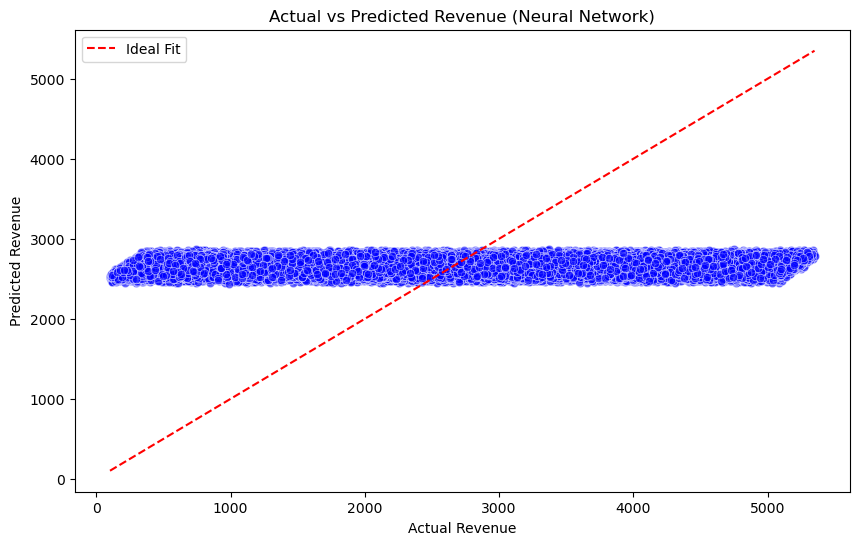

In [39]:
# Visualize the predictions vs. actual values for Neural Network
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=nn_preds, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
plt.title('Actual vs Predicted Revenue (Neural Network)')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.legend()

plt.savefig('output/Revenue_prediction_vs_actual.png')
plt.show()

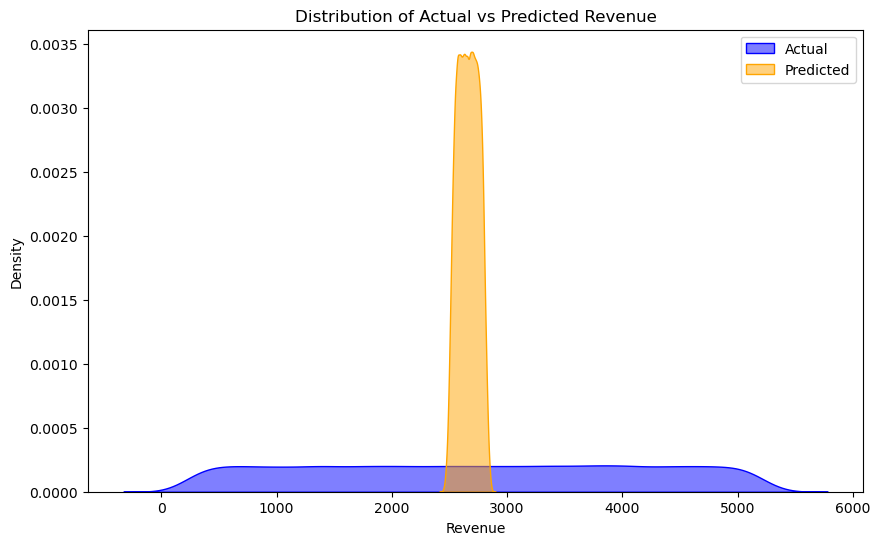

In [40]:
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual', color='blue', fill=True, alpha=0.5)
sns.kdeplot(nn_preds, label='Predicted', color='orange', fill=True, alpha=0.5)
plt.title('Distribution of Actual vs Predicted Revenue')
plt.xlabel('Revenue')
plt.ylabel('Density')
plt.legend()

plt.savefig('output/Revenue_prediction_vs_actual(2).png')
plt.show()

<Figure size 1000x600 with 0 Axes>

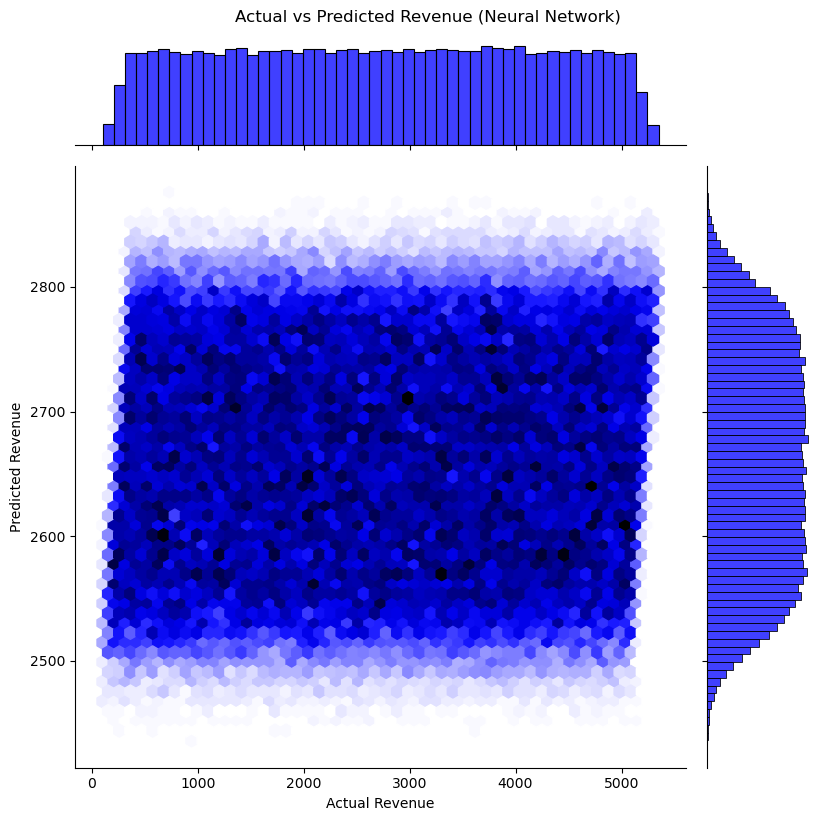

In [41]:
plt.figure(figsize=(10, 6))
sns.jointplot(x=y_test, y=nn_preds, kind="hex", height=8, color="blue")
plt.suptitle('Actual vs Predicted Revenue (Neural Network)', y=1.02)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')

plt.savefig('output/Revenue_prediction_vs_actual(3).png')
plt.show()

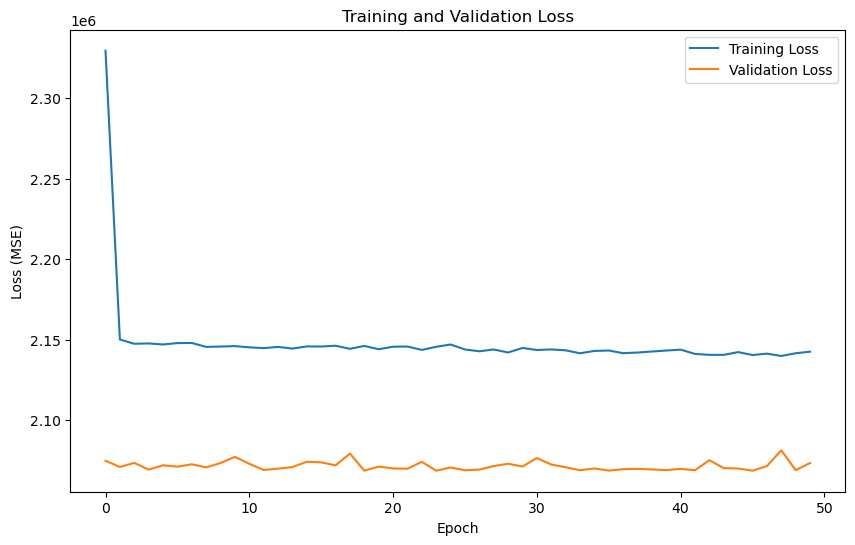

In [42]:
# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()

plt.savefig('output/training_validation_loss.png')
plt.show()